In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import matplotlib.cm as cm
from IPython.display import display
from tqdm import tqdm


in2cm = 1/2.54  # centimeters in inches
font = {'size'   : 14}


In [2]:
# System parameters
kB    = 0.008314463 # kJ mol-1 K
T     = 300         # K
m     = 1           # amu
beta  = 1 / kB / T
gamma = 2
D     = kB * T / m / gamma
sigma = np.sqrt( 2 * D )

In [3]:
# Potential energy function

# Initialize the variables x and y for symbolic calculation
x   =  sp.symbols('x')

# Define the potentials Va, Vb and V with sympy
V2   =  10*(x**2 - 1)**2
V3   =  22*(x**3 - 1.5*x)**2 - x**3 + x


# Calculate derivative
gradV2x   =  V2.diff(x)
gradV3x   =  V3.diff(x)

# To display sympy functions:
# display(gradVx)

# Convert potential and derivatives in numpy functions
V2         =  sp.lambdify((x), V2, modules=['numpy'])
gradV2x    =  sp.lambdify((x), gradV2x, modules=['numpy'])

V3         =  sp.lambdify((x), V3, modules=['numpy'])
gradV3x    =  sp.lambdify((x), gradV3x, modules=['numpy'])

In [4]:
# Grid
xbins     = 100   
xmin      = - 2
xmax      = - xmin
xedges    = np.linspace(xmin, xmax, xbins)  # array with x edges
dx        = xedges[1] - xedges[0]
xcenters  = xedges[:-1] + (dx / 2)                # array with x centers
xbins     = xbins - 1

In [5]:
# Integrator timestep
dt      =  0.0005 # ps
sdt     =  np.sqrt(dt)
Nsteps  = 200000
t       = np.arange(0, Nsteps*dt, dt)

x1       = np.zeros(Nsteps)
x2       = np.zeros(Nsteps)
x3       = np.zeros(Nsteps)

for k in range(Nsteps-1):
    
    # Deterministic force
    F1      = - gradV2x(x1[k])
    F2      = - gradV2x(x2[k])
    F3      = - gradV3x(x3[k])

    # Random force
    eta1    = np.sqrt(3)*np.random.normal(0,1)
    eta2    = np.random.normal(0,1)
    eta3    = np.random.normal(0,1)
    
    # Update position
    x1[k+1] = x1[k] + F1 / m / gamma * dt + sigma * eta1 * sdt
    x2[k+1] = x2[k] + F2 / m / gamma * dt + sigma * eta2 * sdt
    x3[k+1] = x3[k] + F3 / m / gamma * dt + sigma * eta3 * sdt

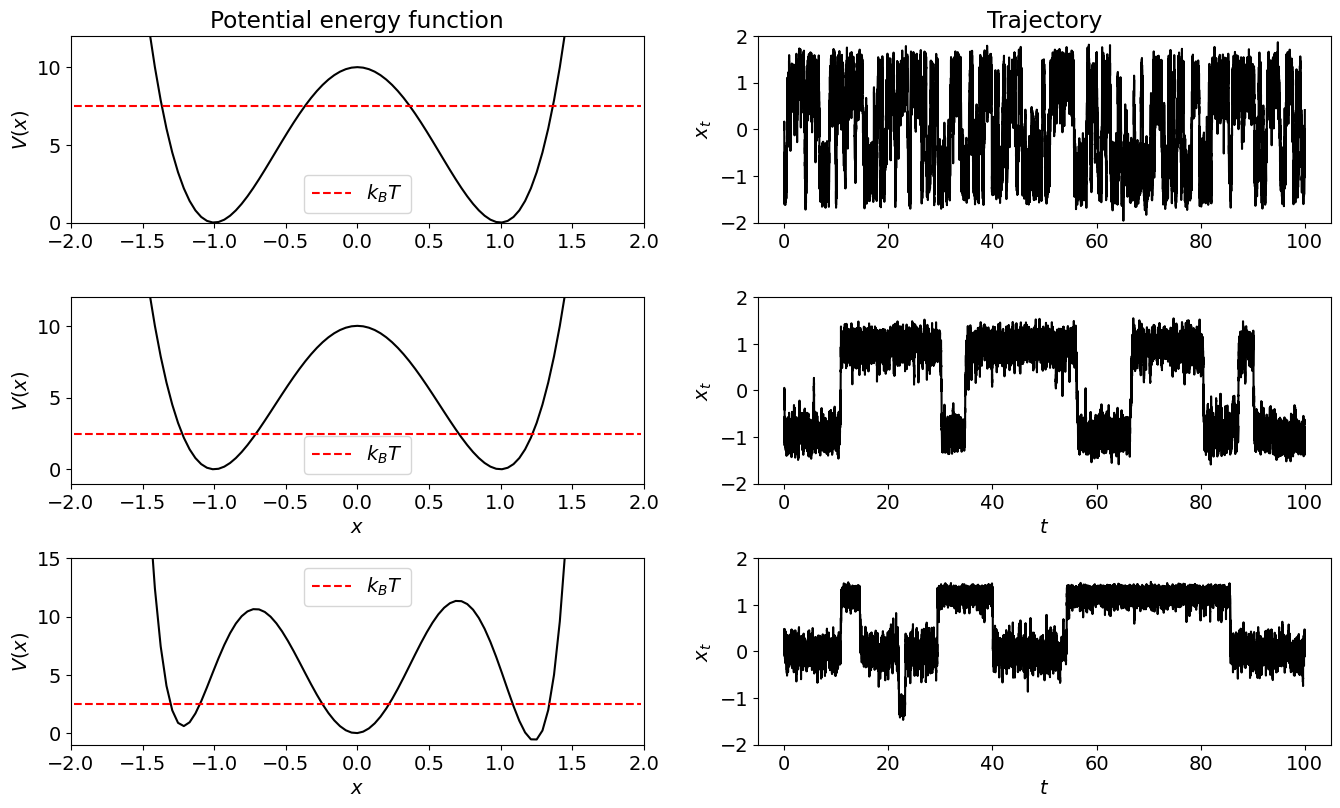

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(32*in2cm, 18*in2cm), facecolor='white')  
plt.rc('font', **font)


ax[0,0].plot(xcenters, V2(xcenters), 'k-') 
ax[0,0].plot(xcenters, 3 * kB * T * np.ones(xcenters.shape), 'r--', label = r'$k_B T$') 
ax[0,0].set_title('Potential energy function')
ax[0,0].set_ylabel(r'$V(x)$');
ax[0,0].set_xlim(xmin,xmax)
ax[0,0].set_ylim(0,12)
ax[0,0].legend()

ax[0,1].plot(t, x1, 'k-')
ax[0,1].set_ylabel(r'$x_t$');
ax[0,1].set_ylim(xmin,xmax)
ax[0,1].set_title('Trajectory')

ax[1,0].plot(xcenters, V2(xcenters), 'k-') 
ax[1,0].plot(xcenters, kB * T * np.ones(xcenters.shape), 'r--', label = r'$k_B T$') 
ax[1,0].set_xlabel(r'$x$')
ax[1,0].set_ylabel(r'$V(x)$');
ax[1,0].set_xlim(xmin,xmax)
ax[1,0].set_ylim(-1,12)
ax[1,0].legend()

ax[1,1].plot(t, x2, 'k-')
ax[1,1].set_xlabel(r'$t$')
ax[1,1].set_ylabel(r'$x_t$');
ax[1,1].set_ylim(xmin,xmax)

ax[2,0].plot(xcenters, V3(xcenters), 'k-') 
ax[2,0].plot(xcenters, kB * T * np.ones(xcenters.shape), 'r--', label = r'$k_B T$') 
ax[2,0].set_xlabel(r'$x$')
ax[2,0].set_ylabel(r'$V(x)$');
ax[2,0].set_xlim(xmin,xmax)
ax[2,0].set_ylim(-1,15)
ax[2,0].legend()

ax[2,1].plot(t, x3, 'k-')
ax[2,1].set_xlabel(r'$t$')
ax[2,1].set_ylabel(r'$x_t$');
ax[2,1].set_ylim(xmin,xmax)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.4);

fig.savefig('metastability.png', format='png', dpi=900, bbox_inches='tight')